## Case study for Media company
Some Reasons
* Decline in number of people coming to the platform
* fewer people watching video
* decrease in marketing spend
* competitive shows
* special holidays
* Twist in the story

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
media = pd.read_csv('data/mediacompany.csv')
media = media.drop('Unnamed: 7',axis=1)

In [6]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [7]:
media['Date'] = pd.to_datetime(media['Date'])


In [8]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


### our multiple linear regression looks like
$y = \sum_{i} m_ix_i  + c $

In [42]:
# deriving day since the show started
d0 = pd.Timestamp(2017,2,28)
d1 = media['Date']
delta = d1 - d0
media['day'] = delta

In [43]:
def cutDate(x):
    return int(str(x)[0:2])

In [48]:
# converting date to int
media['day'] = media['day'].apply(cutDate)

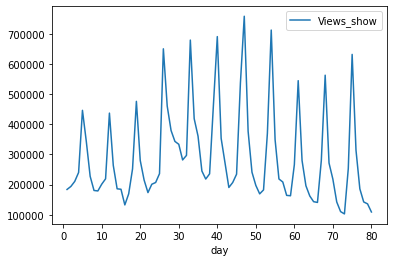

In [49]:
# days vs view show
media.plot.line(x='day',y='Views_show')
plt.show()

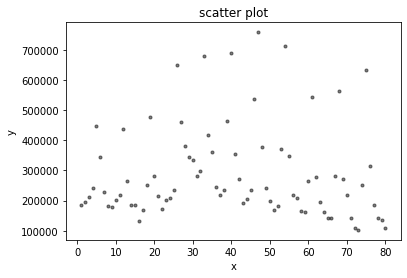

In [55]:
# scatter plot
colors = '#000000'
area = np.pi*3
plt.scatter(x=media['day'],y=media['Views_show'],s=area,c=colors,alpha=.5)
plt.title('scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

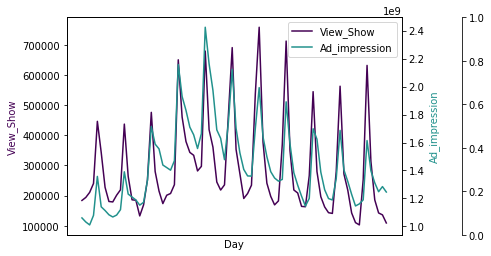

In [56]:
# view shows and add impression with respect to the day

# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))
# no x-ticks
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

In [57]:
# Generate weekday variable
# weekdays are taken such that 1 corresponds to Sunday 7 to Saturday
# we know the number it started it started in wednesday
media['weekday'] = (media['day']+3) % 7
media['weekday'].replace(0,7,inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [58]:
X = media[['Visitors','weekday']]
y = media['Views_show']

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lm = LinearRegression()

In [62]:
lm.fit(X,y)


LinearRegression()

In [63]:
# or do it with OLS to check the summary

import statsmodels.api as sts

X = sts.add_constant(X)

lm_1 = sts.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           8.01e-12
Time:                        22:26:07   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [65]:
def weekend(i):
    if i % 7 == 5 or i % 7 == 4:
        return 1
    return 0

media['weekend'] = media['day'].apply(weekend)

In [66]:
import statsmodels.api as sts
X = media[['Visitors','weekend']]
y = media['Views_show']

X = sts.add_constant(X)

lm_2 = sts.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           2.51e-12
Time:                        22:32:43   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [67]:
import statsmodels.api as sts
X = media[['Visitors','weekend','Character_A']]
y = media['Views_show']

X = sts.add_constant(X)

lm_3 = sts.OLS(y,X).fit()
print(lm_3.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           1.53e-14
Time:                        22:37:35   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      